# LIBRARIES

In [ ]:
# LOAD
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# MODEL SELECTION / VALIDATION
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV
)

# FEATURE SELECTION
from sklearn.feature_selection import RFE, RFECV

# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# METRICS
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    roc_auc_score,
    auc,
    roc_curve
)

# LOAD DATASET

I load the dataset Bank Churners, which I downloaded from Kaggle. Specifically, it comes from the Credit Card Customers dataset created by Sakshi Goyal.

In [40]:
df = pd.read_csv("C:/Users/Francesco Beretta/Downloads/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


I remove the last 2 columns according to the dataset description on Kaggle.

In [41]:
df = df.iloc[:, :-2] 
df.shape

(10127, 21)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [43]:
df.CLIENTNUM.unique()

array([768805383, 818770008, 713982108, ..., 716506083, 717406983,
       714337233], shape=(10127,))

I decide to remove the CLIENTUM variable because it represents a unique identifier for each person and provides no useful information for classifying whether a customer will churn.

In [44]:
df = df.drop(columns=['CLIENTNUM'], axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# EXPLORATORY DATA ANALYSIS (EDA)

To begin the analysis, I conduct a thorough Exploratory Data Analysis (EDA) to understand the structure and key characteristics of the dataset before moving to any modeling step. This phase allows me to identify patterns, detect anomalies, and uncover relationships between variables. In particular, I examine the distribution of the target variable, perform univariate analysis on both numerical and categorical features, explore how these features relate to the target, and analyze correlations through a heatmap to gain a comprehensive view of the underlying data dynamics.

#### Target Variable Analysis

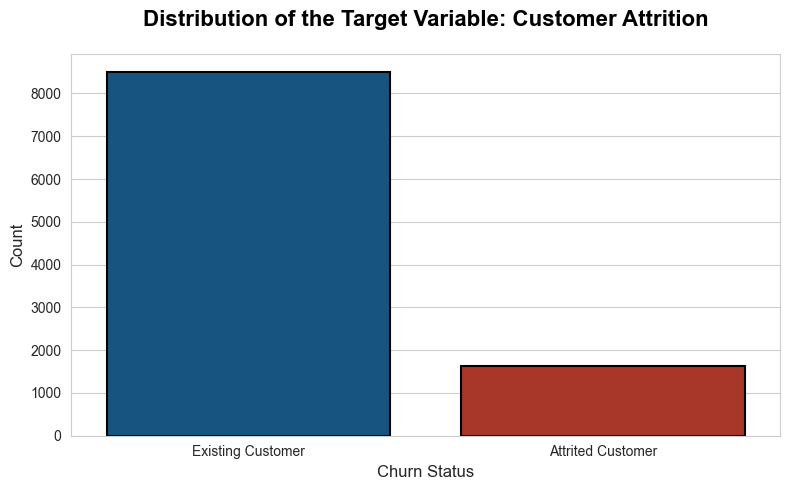

In [45]:
# Class color mapping
color_map = {
    'Existing Customer': '#055991',
    'Attrited Customer': '#bd2514'
}

sns.set_style("whitegrid")

# plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(
    data=df,
    x='Attrition_Flag',
    palette=color_map,
    ax=ax,
    edgecolor='black', 
    linewidth=1.5              
)

ax.set_title(
    "Distribution of the Target Variable: Customer Attrition", 
    fontsize=16, 
    fontweight='bold', 
    pad=20, 
    color='black'
)

ax.set_xlabel("Churn Status", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.tight_layout() 
plt.show()

The target variable exhibits a clear class imbalance, which could otherwise hinder the effectiveness of the classification task. This issue will be properly addressed during the preprocessing phase to ensure balanced learning conditions and support a more reliable model performance.

#### Univariate Analysis of Numerical Features

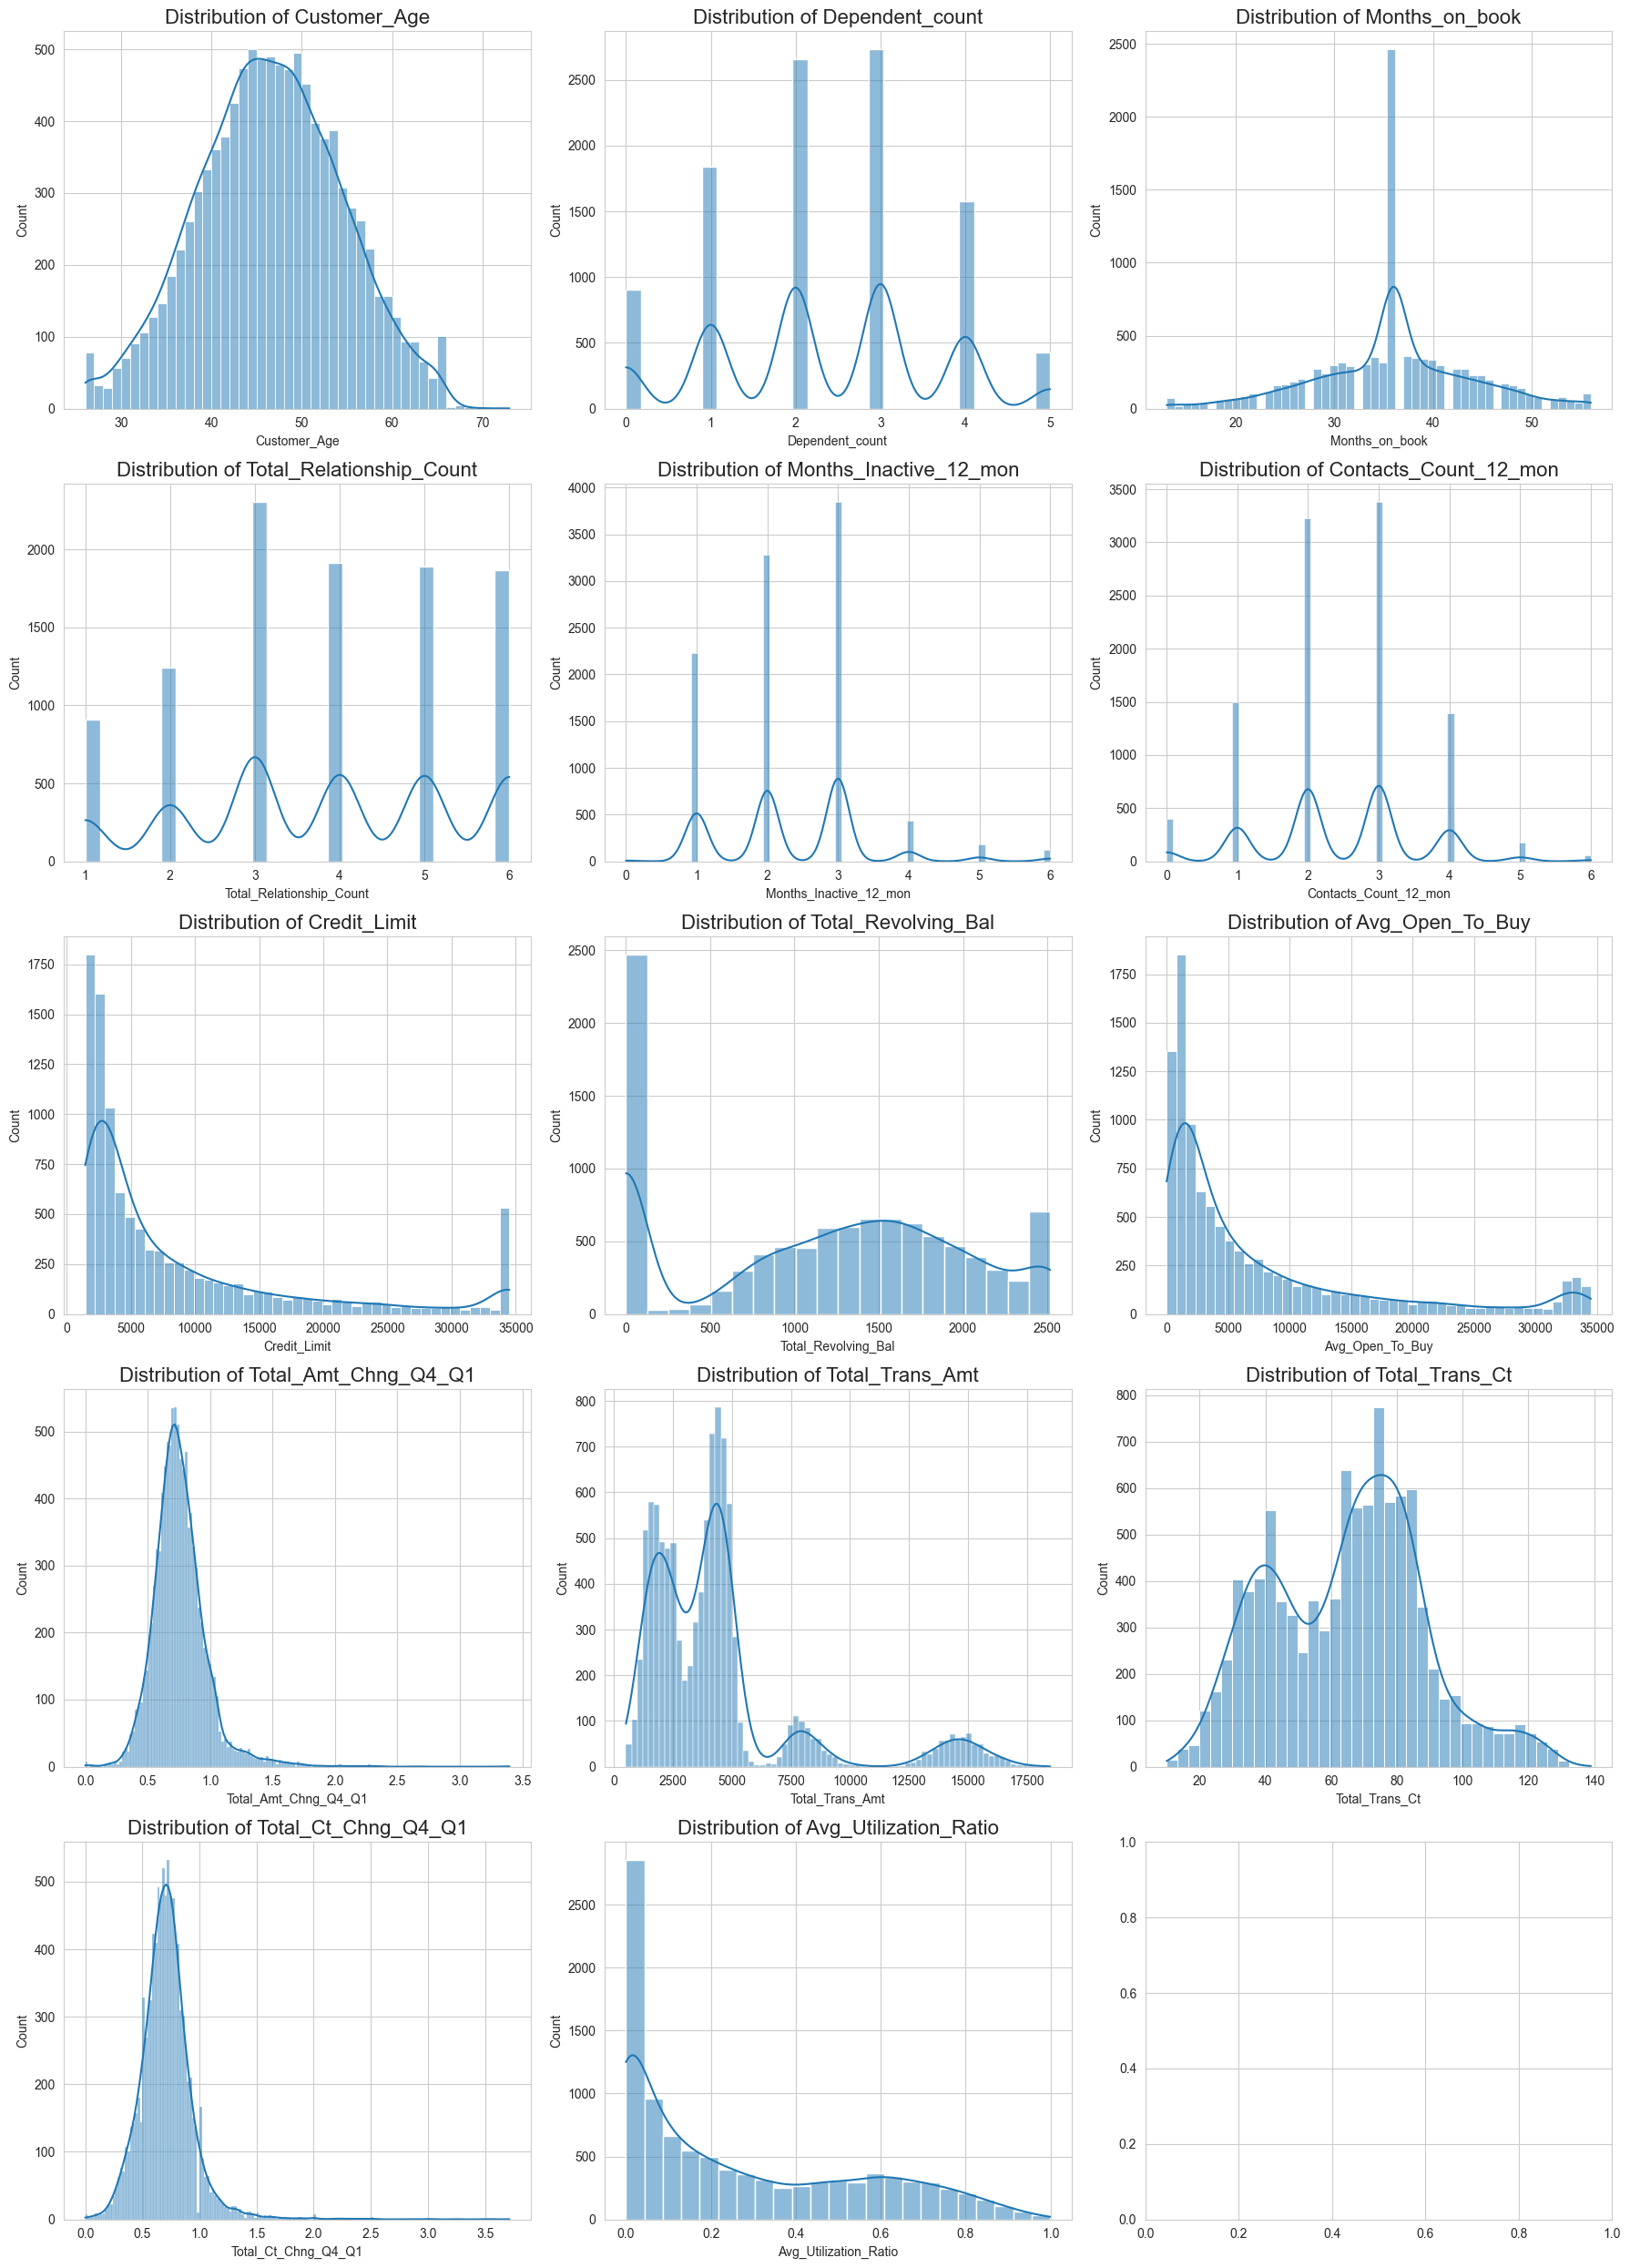

In [46]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(5, 3, figsize=(18, 5 * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=16)

plt.tight_layout()
plt.show()

The univariate distributions of the numerical features reveal a heterogeneous set of behaviors that reflect the diverse financial profiles and engagement patterns of the bank’s customers. Several variables show pronounced skewness, indicating the presence of customers with substantially different spending capacities and usage habits. Other features, such as age and change-related metrics, display more concentrated shapes, suggesting more homogeneous patterns in demographic attributes and quarter-over-quarter variations.

Moreover, the presence of multimodal patterns in variables tied to customer activity hints at distinct behavioral segments within the customer base, possibly reflecting varying levels of engagement or financial dependence on the credit card product. These distributional characteristics highlight the importance of appropriate scaling and potential transformation during preprocessing, as well as the need to consider non-linear relationships in later modeling stages.

#### Univariate Analysis of Categorical Features

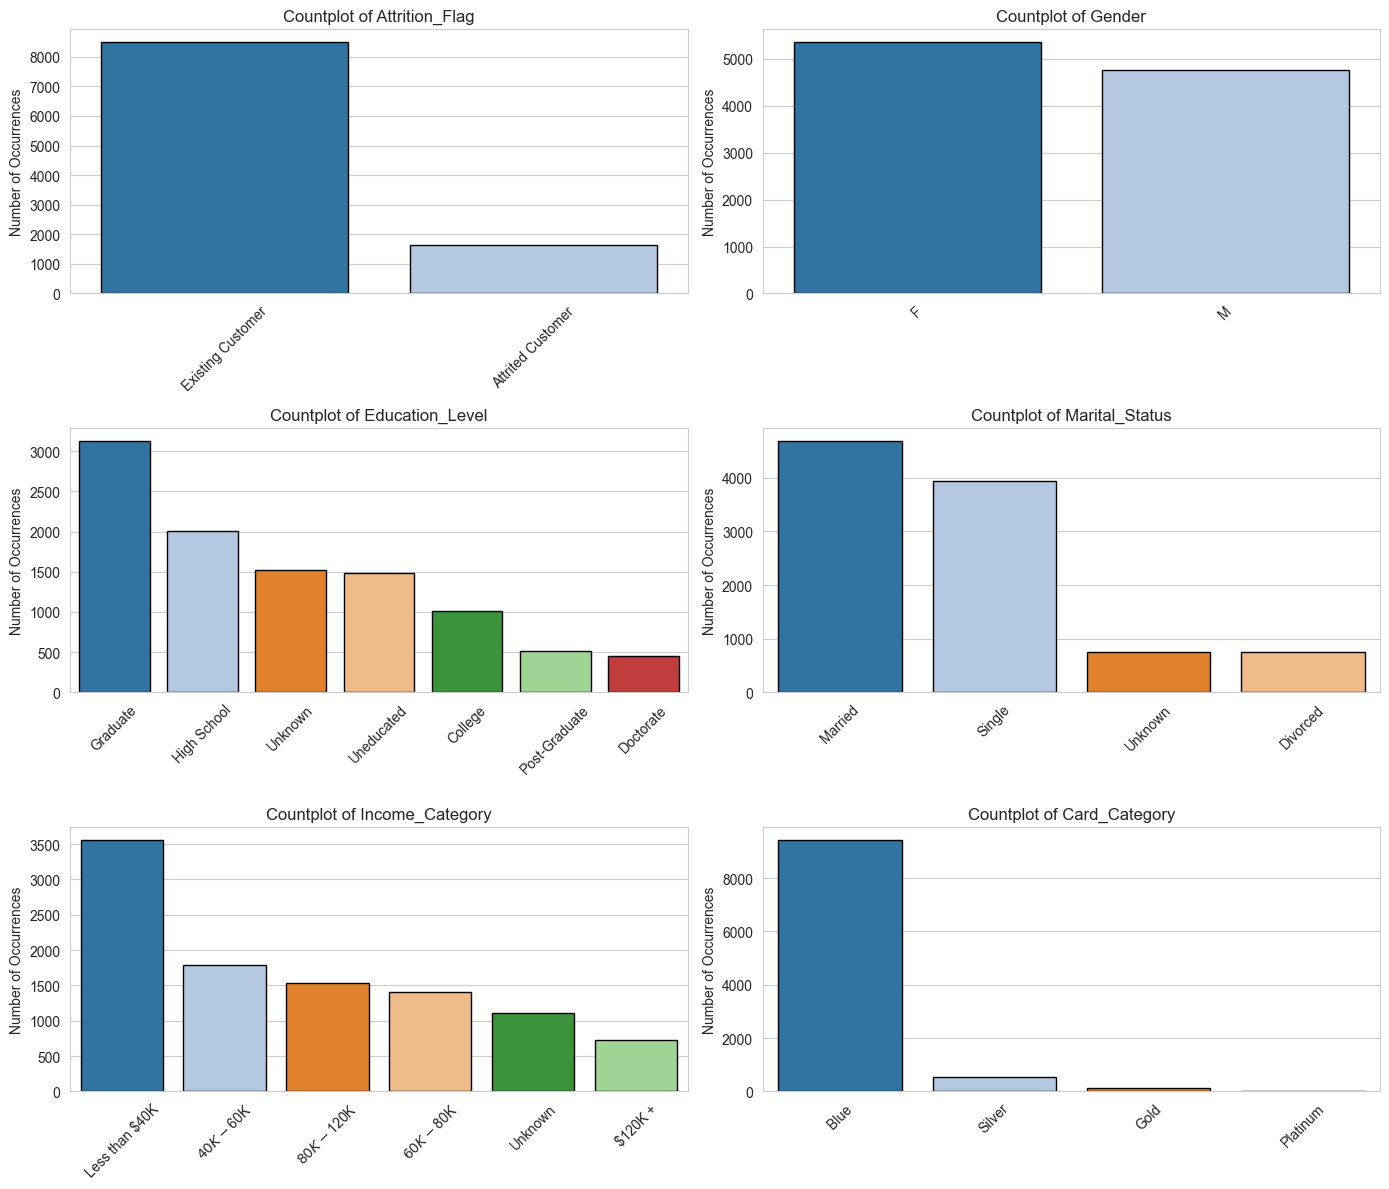

In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 2, figsize=(14, 4 * 3))

axes = axes.flatten()

for ax, col in zip(axes, categorical_cols):
    n_unique = df[col].nunique() # Number of categories

    palette = sns.color_palette("tab20", n_unique)

    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        ax=ax,
        palette=palette,
        edgecolor="black"
    )
    ax.set_title(f"Countplot of {col}")
    ax.set_xlabel('')
    ax.set_ylabel('Number of Occurrences')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The dataset's compositional analysis reveals a base heavily concentrated in specific segments. As previously observed, the customer population is mostly made up of existing clients. Demographically, Gender is well-distributed, though Marital Status leans heavily toward Married and Single people. The financial profile shows a clear pattern, with the largest groups earning "Less than $40K" and almost all of them having a Blue Card. Educationally, the most common categories are Graduate and High School. This strong focus on standard, lower-cost, and common market segments shows that these groups are the main part of the bank's customer base.

#### Target vs Categorical Features

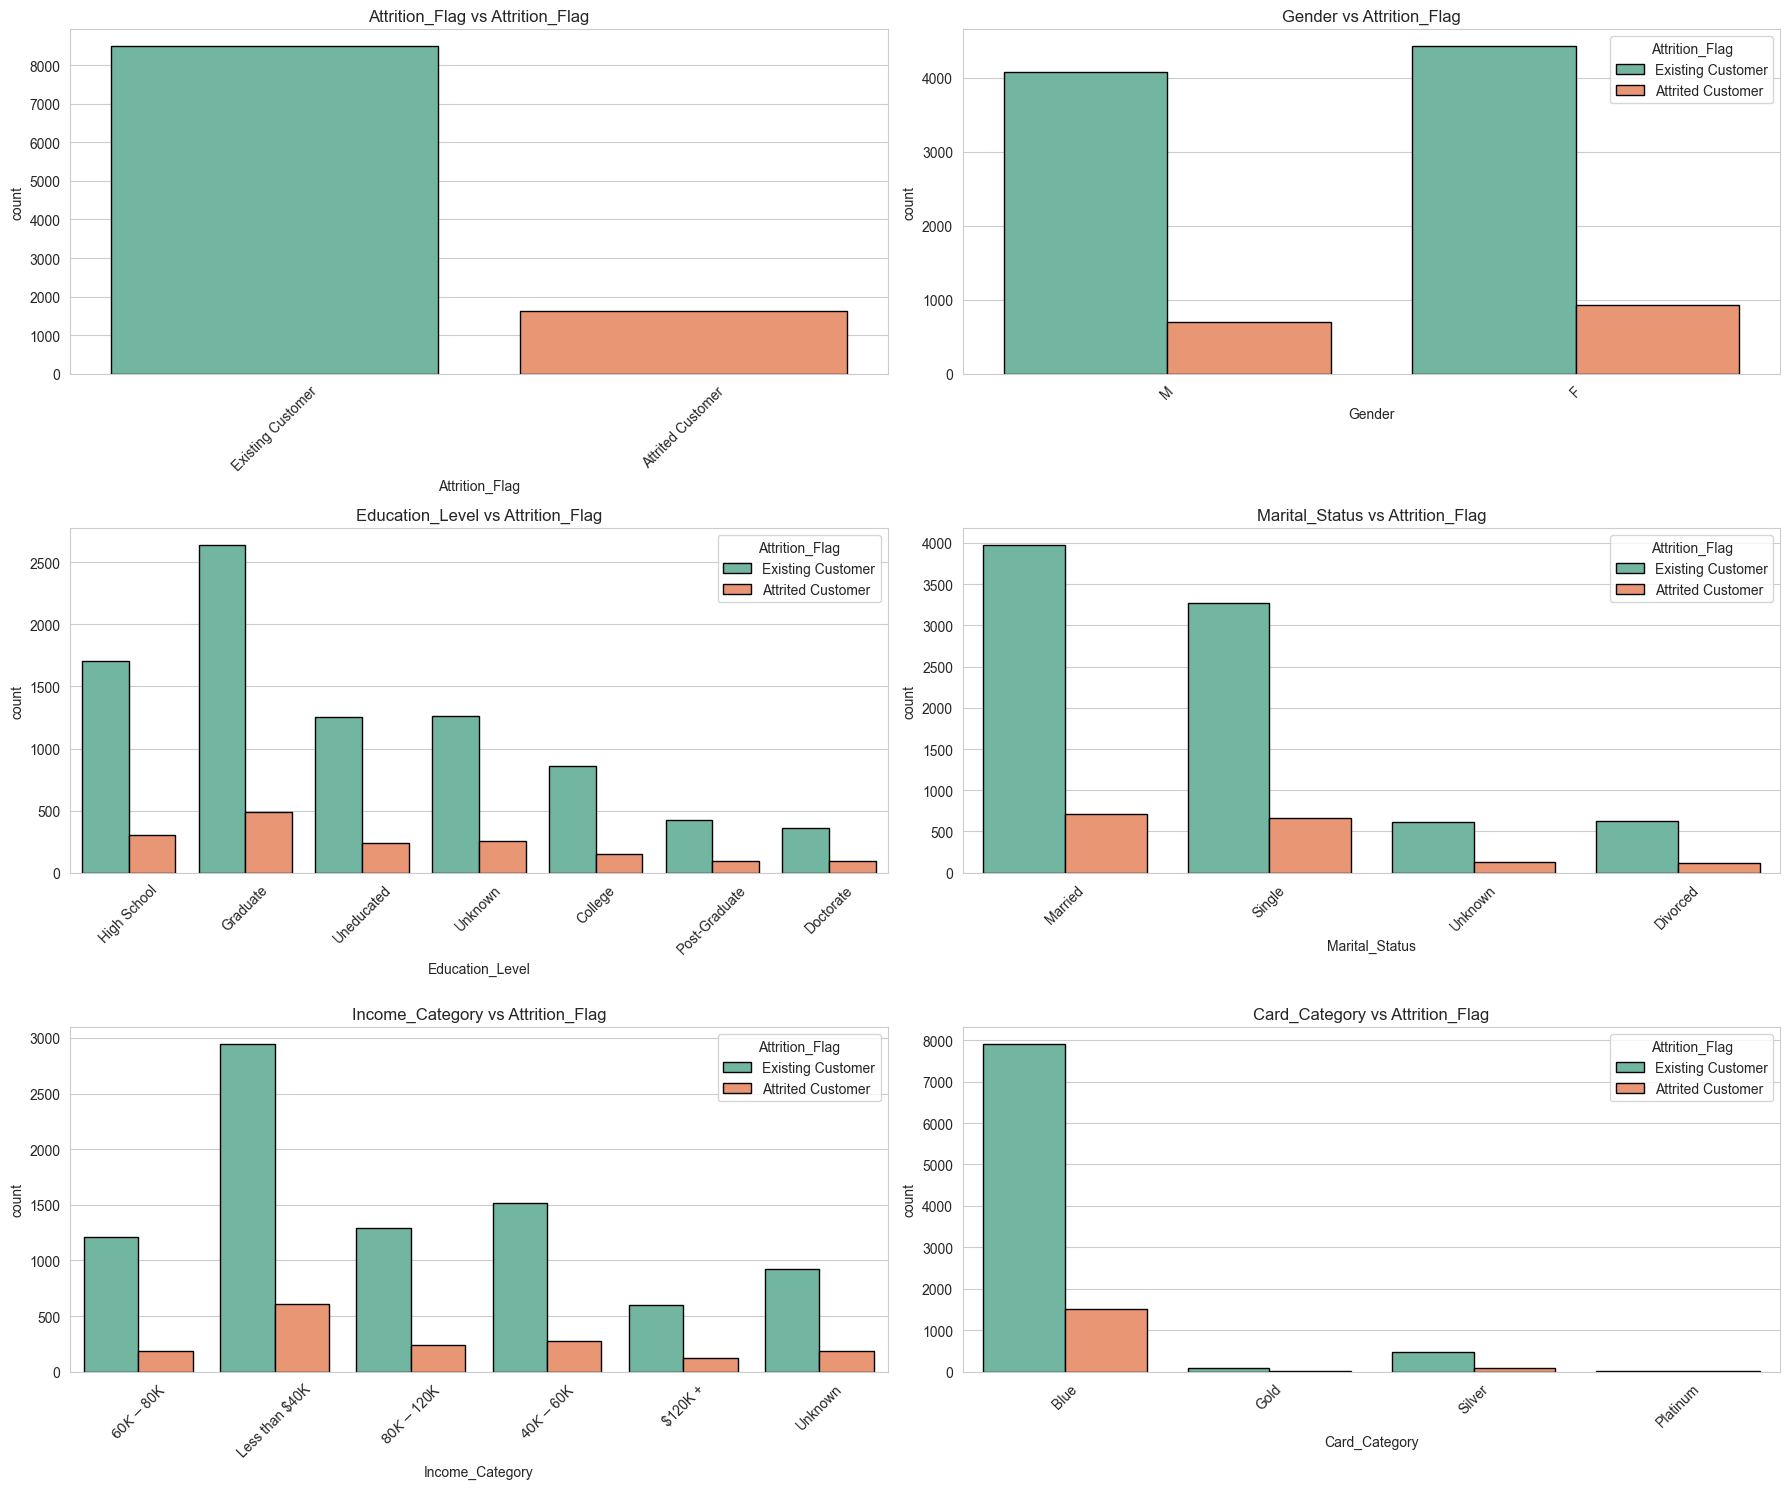

In [48]:
palette = "Set2"

fig, axes = plt.subplots(3, 2, figsize=(18, 5 * 3))
axes = axes.flatten() 

for ax, col in zip(axes, categorical_cols):
    sns.countplot(
        data=df,
        x=col,
        hue='Attrition_Flag',
        palette=palette,
        ax=ax,
        edgecolor="black"   
    )
    
    ax.set_title(f"{col} vs Attrition_Flag")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Gender, Education_Level, and Income_Category show a clearer separation between churned and non-churned customers compared to the other categorical features. These variables tend to reflect differences in financial habits and customer expectations, which can naturally influence the likelihood of leaving the service. In contrast, features like Marital_Status display no strong or consistent pattern with respect to churn.

#### Target vs Numerical Features

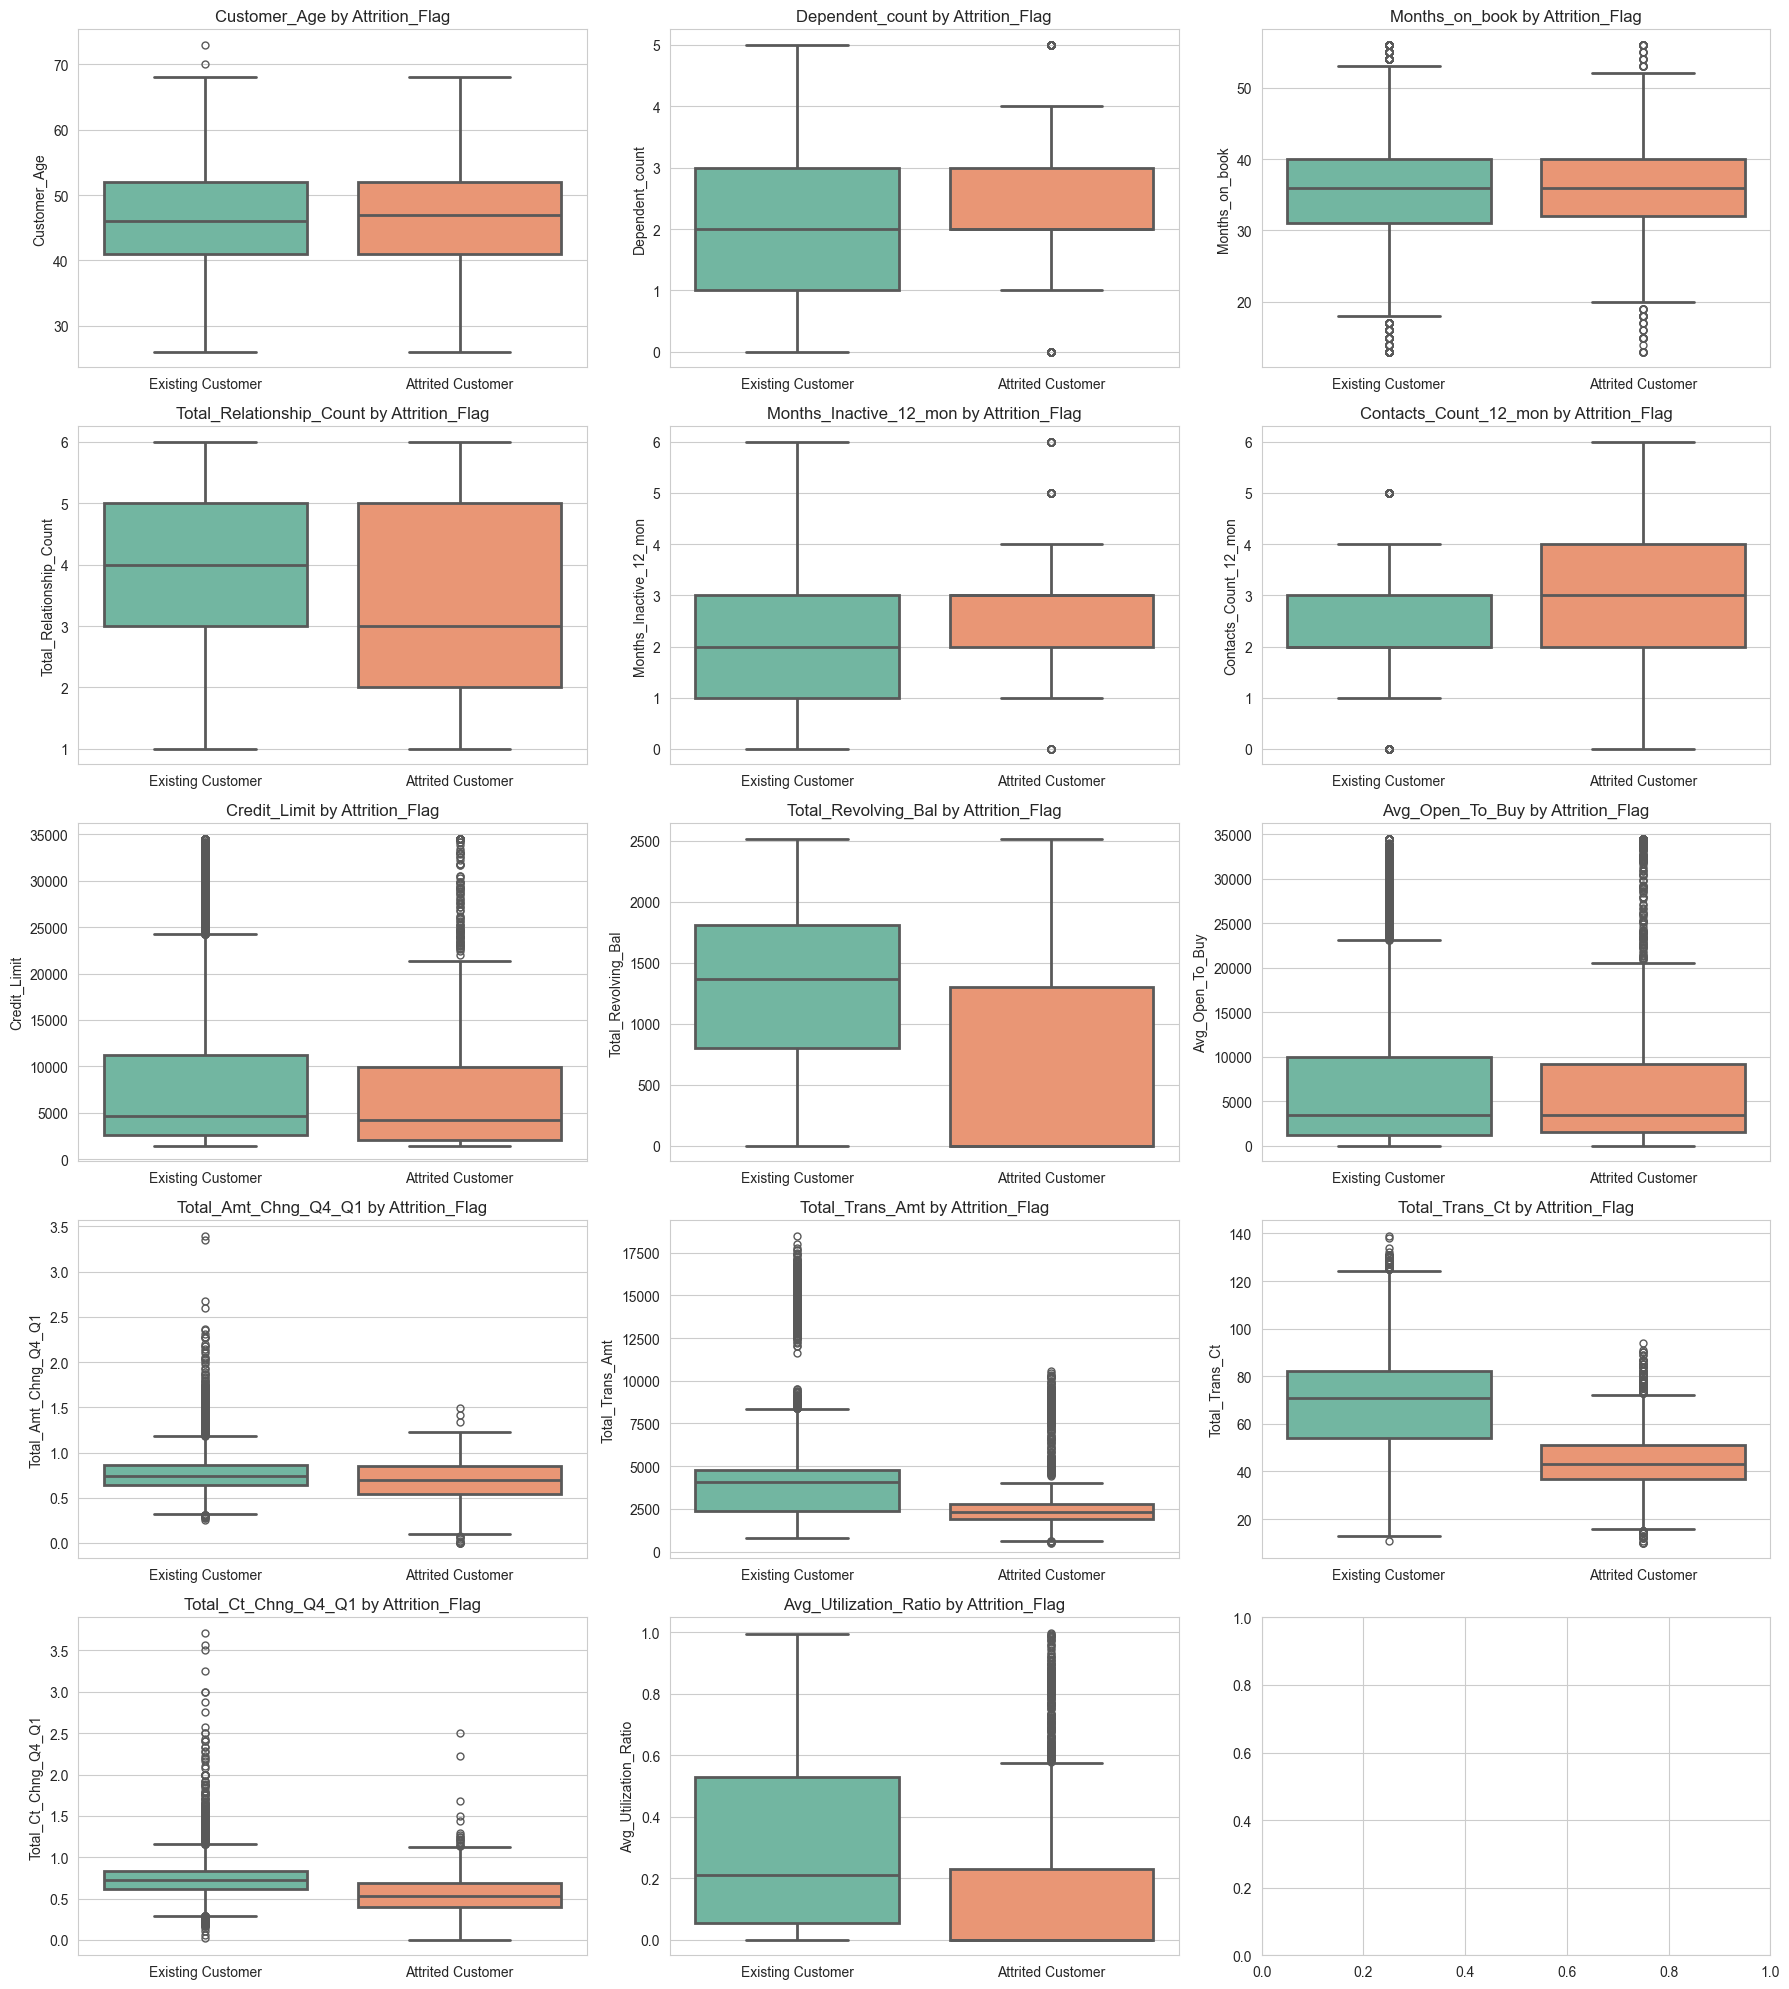

In [49]:
sns.set_style("whitegrid")


fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten() 

palette = "Set2"  

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(data=df, x='Attrition_Flag', y=col, palette=palette, ax=ax,
                linewidth=2, fliersize=5)  
    ax.set_title(f"{col} by Attrition_Flag", fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

The box plots highlight clear differences in customer activity between retained and attrited clients. Those who churn tend to have lower values in key engagement metrics such as Total_Relationship_Count, Total_Trans_Amt, and Total_Trans_Ct, reflecting reduced interaction with the bank prior to leaving. At the same time, they show higher levels of inactivity, more frequent contacts with the bank, and a higher utilization ratio. In contrast, variables like Customer_Age and Months_on_book largely overlap across the two groups, making them weaker indicators of attrition on their own compared to the activity-related features.

#### Correlation between Features

For convenience and ease of modeling, I map the target variable into binary values, assigning 1 to churned customers and 0 to existing customers.

In [50]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1}) 

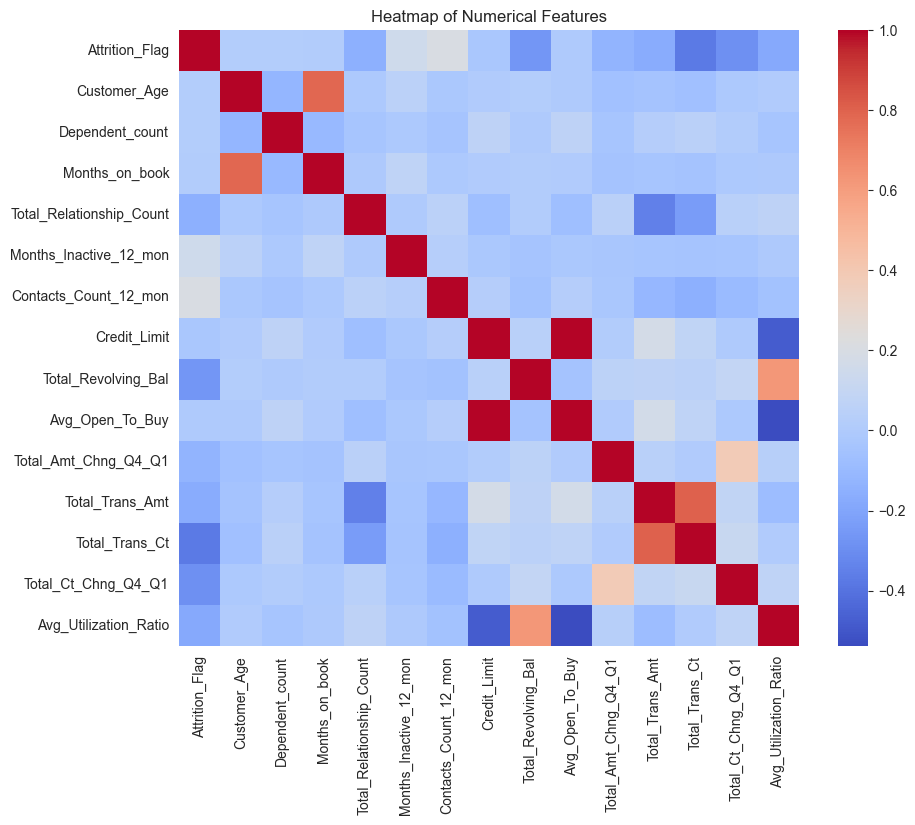

In [51]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Heatmap of Numerical Features")
plt.show()

Based on the correlation analysis, the features most associated with the target variable, Attrition_Flag, are related to customer engagement and transactional activity. In particular, Total_Trans_Ct, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, and Total_Ct_Chng_Q4_Q1 show the strongest correlations, suggesting that more active and engaged customers are less likely to churn. Financial metrics such as Total_Revolving_Bal and Avg_Utilization_Ratio exhibit moderate influence, while other financial variables like Credit_Limit and Avg_Open_To_Buy show very weak correlations. Demographic features, including Customer_Age and Dependent_count, have minimal correlation with churn, indicating limited predictive power on their own. Overall, account activity and engagement-related features appear to be the most informative for predicting customer attrition, whereas demographic and general financial features are less directly related.

# PREPROCESSING

#### Handling missing values

In [52]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing values.

#### Handling Outliers

In [53]:
numerical_cols = df.drop(columns=['Education_Level','Marital_Status','Income_Category','Card_Category',
                                  'Gender','Attrition_Flag'], axis=1)

def handling_outliers(numerical_cols, features, n):
    outlier_indices = set()
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR
        indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(indices)
    return list(outlier_indices)

len(handling_outliers(numerical_cols, numerical_cols.columns, n=1.5))

3326

Given the large number of outliers, I chose to retain them, as they may partly reflect characteristics of the minority class.

#### Binary Encoding

In [54]:
print(df['Gender'].value_counts())

Gender
F    5358
M    4769
Name: count, dtype: int64


In [55]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Train-Test Splitting

To address the class imbalance, I apply a stratified train-test split to ensure that both sets preserve the original proportion of the target classes.

In [56]:
X = df.drop(columns=['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#### Features Encoding

In [57]:
print(df['Education_Level'].value_counts())
print(df['Marital_Status'].value_counts())
print(df['Income_Category'].value_counts())
print(df['Card_Category'].value_counts())

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


Although some categorical features have a natural order, the differences between consecutive values are not consistent or meaningful for the model. Therefore, I applied One-Hot Encoding to represent each category as a separate binary feature.

In [58]:
categorical = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical = [c for c in X_train.columns if c not in categorical]

# encoder only on categorical features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[categorical])
X_test_cat = encoder.transform(X_test[categorical])

# to recreate DataFrame 
cat_cols = encoder.get_feature_names_out(categorical)
X_train_cat = pd.DataFrame(X_train_cat, columns=cat_cols, index=X_train.index)
X_test_cat = pd.DataFrame(X_test_cat, columns=cat_cols, index=X_test.index)

X_train = pd.concat([X_train[numerical], X_train_cat], axis=1)
X_test = pd.concat([X_test[numerical], X_test_cat], axis=1)
X_train.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
8948,44,0,3,36,2,3,3,6680.0,1839,4841.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6665,39,0,1,34,3,1,1,2884.0,2517,367.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7119,52,1,1,36,4,2,2,14858.0,1594,13264.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2257,34,1,0,17,4,1,4,2638.0,2092,546.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3461,47,1,5,36,3,1,2,8896.0,1338,7558.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Handling Imbalance Target Class 

Given the strong class imbalance in the dataset, I applied SMOTE (Synthetic Minority Over-sampling Technique) to the training set in order to generate synthetic examples of the minority class and help the model learn more effectively.

In [59]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#### Scaling Continuos Numerical Features

To ensure that all numerical features contribute equally to the model and to improve convergence for algorithms sensitive to feature scale, I applied StandardScaler to standardize the continuous variables. This transforms each feature to have a mean of 0 and a standard deviation of 1, making the data more suitable for modeling.

In [60]:
numerical = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
             'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
             'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
categorical = [c for c in X_train_res.columns if c not in numerical]

# Scaler only on numerical features
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_res[numerical])
X_test_num = scaler.transform(X_test[numerical])

# to recreate DataFrame 
num_cols = scaler.get_feature_names_out(numerical)
X_train_num = pd.DataFrame(X_train_num, columns=num_cols, index=X_train_res.index)
X_test_num = pd.DataFrame(X_test_num, columns=num_cols, index=X_test.index)

X_train_res = pd.concat([X_train_res[categorical], X_train_num], axis=1)
X_test = pd.concat([X_test[categorical], X_test_num], axis=1)
X_train_res.head()

,Gender,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.719871,0.462808,-0.192691,1.000032,-0.289976,-0.551516,1.238966,1.702045,-0.490111,0.181436
1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.500198,-1.491233,-0.608096,1.764149,-0.779899,-0.184038,0.317464,1.349662,0.396511,2.357290
2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,-0.390164,-0.514213,0.702245,0.723914,0.632381,-1.068885,0.146742,0.688944,-0.046800,-0.429840
3,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.500198,1.439828,-0.635016,1.285167,-0.760297,-0.677232,-0.642558,-0.588446,-1.291481,2.066206
4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.500198,-0.514213,0.049810,0.435397,0.007548,0.048053,0.135644,0.600848,-0.238618,-0.273382


# TRAINING & MODELS RESULTS

#### Recursive Feature Elimination (RFE) / Models Comparison

I apply RFECV (Recursive Feature Elimination with Cross-Validation) to wrap a LogisticRegression model. The choice of LogisticRegression as the estimator is deliberate because it's fast and interpretable, and its feature coefficients clearly indicate importance. The Logistic setup (class_weight='balanced' is applied to the estimator, and the scoring='f1' metric is used across the 5-fold cross-validation) ensures that the resulting number of features (n_optimal_features) is not only statistically robust but is specifically optimized to maximize the F1-Score, which is essential for handling the imbalanced classes effectively. The output, n_optimal_features, serves as the fixed parameter for the subsequent model testing phase.

In [61]:
rfecv_selector = RFECV(estimator=LogisticRegression(class_weight='balanced', random_state=42), 
                       step=1, cv=5, scoring='f1')
rfecv_selector.fit(X_train_res, y_train_res)

n_optimal_features = rfecv_selector.n_features_ 
print(n_optimal_features)

28


I now performs a systematic benchmarking of four different classification models (Logistic Regression, Decision Tree, Random Forest, and XGBoost) using the optimal feature count determined previously.
The process uses Stratified K-Fold Cross-Validation to ensure class distribution is preserved across the five folds. Within each fold, two key operations occur:
- Feature Selection Consistency: An RFE selector is fitted on the training fold, crucially using the same LogisticRegression(class_weight='balanced') estimator used above. This ensures that the subset of features chosen (n_optimal_features) is coherently derived from the robust, linearly important variables, even when applied to non-linear models like Random Forest and XGBoost.
- Model Training and Evaluation: Each of the four classifier models is trained on the selected features (X_tr_sel) and then evaluated on the test fold (X_te_sel). Two key performance metrics are tracked: the Accuracy (used primarily to observe potential overfitting by comparing train vs. test scores) and the F1-Score (used as the primary metric for performance on the imbalanced churn problem).

In [62]:
classifiers = [
    ("Logistic Regression", LogisticRegression(class_weight='balanced', random_state=42, max_iter= 1500, n_jobs=-1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs =-1)),
    ("XGBoost", xgb.XGBClassifier(random_state=42, n_jobs =-1, use_label_encoder=False, eval_metric='logloss'))
]

# RFE selector
rfe_base_estimator = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500, n_jobs=-1) 

results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in classifiers:
    print(f"Processing {model_name}...")
    
    train_acc_scores = []
    test_acc_scores = []
    train_f1_scores = []
    test_f1_scores = []

    train_scores = []
    test_scores = []

    # Cross-validation 
    for train_idx, test_idx in cv.split(X_train_res, y_train_res):

        X_tr_fold = X_train_res.iloc[train_idx]
        y_tr_fold = y_train_res.iloc[train_idx]
        X_te_fold = X_train_res.iloc[test_idx]
        y_te_fold = y_train_res.iloc[test_idx]

        # RFE fit on training fold
        rfe = RFE(estimator=rfe_base_estimator,
                           n_features_to_select=n_optimal_features)
        rfe.fit(X_tr_fold, y_tr_fold)

        X_tr_sel = rfe.transform(X_tr_fold)
        X_te_sel = rfe.transform(X_te_fold)

        # model fit 
        model.fit(X_tr_sel, y_tr_fold)
        
        # Evaluation
        y_pred_tr = model.predict(X_tr_sel)
        y_pred_te = model.predict(X_te_sel)

        train_acc_scores.append(accuracy_score(y_tr_fold, y_pred_tr))
        test_acc_scores.append(accuracy_score(y_te_fold, y_pred_te))

        train_f1_scores.append(f1_score(y_tr_fold, y_pred_tr))
        test_f1_scores.append(f1_score(y_te_fold, y_pred_te))
        
    # Results
    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(train_acc_scores),
        "Mean Test Accuracy": np.mean(test_acc_scores),
        "Mean Train F1-Score": np.mean(train_f1_scores),
        "Mean Test F1-Score": np.mean(test_f1_scores)
    })

results_df = pd.DataFrame(results)

display(results_df)

Processing Logistic Regression...
Processing Decision Tree...
Processing Random Forest...
Processing XGBoost...


,Model Name,Mean Train Accuracy,Mean Test Accuracy,Mean Train F1-Score,Mean Test F1-Score
0,Logistic Regression,0.878215,0.876869,0.878613,0.877174
1,Decision Tree,1.000000,0.950580,1.000000,0.950642
2,Random Forest,1.000000,0.979913,1.000000,0.979968
3,XGBoost,1.000000,0.984620,1.000000,0.984644


The model benchmarking clearly shows that XGBoost (F1-Score: 0.985) and Random Forest (F1-Score: 0.980) are the top-performing non-linear classifiers, significantly outperforming the Logistic Regression (F1-Score: 0.877). All tree-based models achieved perfect scores on the training set (1.000), but XGBoost and Random Forest demonstrated excellent generalization, maintaining their high performance on the test set with minimal drops, proving highly robust. The Decision Tree showed the largest drop in score, indicating a higher risk of overfitting. Given its highest F1-Score on unseen data, the XGBoost Classifier is the best model for predicting customer churn in this dataset.

#### Testing the Best Model

Following the initial benchmarking that identified XGBoost as the best classifier, I implement a Grid Search strategy to perform hyperparameter tuning and mitigate the risk of overfitting. I adopt also in this case the RFE (Recursive Feature Elimination), driven by a LogisticRegression(class_weight='balanced') estimator, to select the optimal 28 features (number chosen in the previous code). The GridSearchCV is then employed with an extensive grid of parameters (including regularization terms like reg_alpha and reg_lambda to control complexity) and StratifiedKFold to maximize the f1 scoring metric. This systematic approach aims to find the set of hyperparameters that yields the highest predictive performance while ensuring stability on the imbalanced test set.

In [63]:
# Fix RFE estimator
rfe_base_estimator = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500, n_jobs=-1)
rfe_selector = RFE(estimator=rfe_base_estimator, n_features_to_select=28)

# RFE on training set
rfe_selector.fit(X_train_res, y_train_res)
X_train_sel = rfe_selector.transform(X_train_res)
X_test_sel = rfe_selector.transform(X_test)


# HYPERPARAMETER TUNING with GRID SEARCH 

# Base model
xgb_model = xgb.XGBClassifier(
    random_state=42, 
    n_jobs=-1, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

# Parameter grid for GRID SEARCH
param_grid = {
    'max_depth': [3, 4, 5], 
    'min_child_weight': [5, 7], 
    'gamma': [0.1, 0.5],       
    'reg_alpha': [0.005, 0.1, 0.5], 
    'reg_lambda': [0.5, 1.0, 1.5],       
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [100, 200]
}

# Apply StratifiedKFold for Cross-Validation to preserve the balance on target classes
cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',              
    cv=cv_folds,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_sel, y_train_res)


# Final evaluation of the best model
best_xgb = grid_search.best_estimator_
print(f"Best hyperparameter found: {grid_search.best_params_}")
print(f"Best F1-Score in Cross-Validation: {grid_search.best_score_:.4f}")

y_pred_test = best_xgb.predict(X_test_sel)

f1_test = f1_score(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)

print('\nTesting Classification Report:\n')
print(classification_report(y_test, y_pred_test))

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best hyperparameter found: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.005, 'reg_lambda': 0.5}
Best F1-Score in Cross-Validation: 0.9829

Testing Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2551
           1       0.91      0.88      0.89       488

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



The final classification report demonstrates that the optimized XGBoost model achieves excellent predictive performance on the held-out, imbalanced test set. The overall Accuracy is 97%, indicating a high rate of correct predictions. Crucially, performance is strong across both classes: the model maintains high scores for the Majority Class (Existing Customers), achieving a Precision and Recall of 0.98. For the Minority Class (Attrited Customers), the model achieves a strong F1-Score of 0.89 (Precision 0.91, Recall 0.88). This F1-Score of 0.89 confirms the successful mitigation of the original severe overfitting observed during the initial benchmark, as the model generalizes effectively. The high scores for both classes result in a robust Macro Average F1-Score of 0.94, validating the effectiveness of the hyperparameter tuning and the feature selection strategy used.

#### Result Visualizations

##### Feature Importance

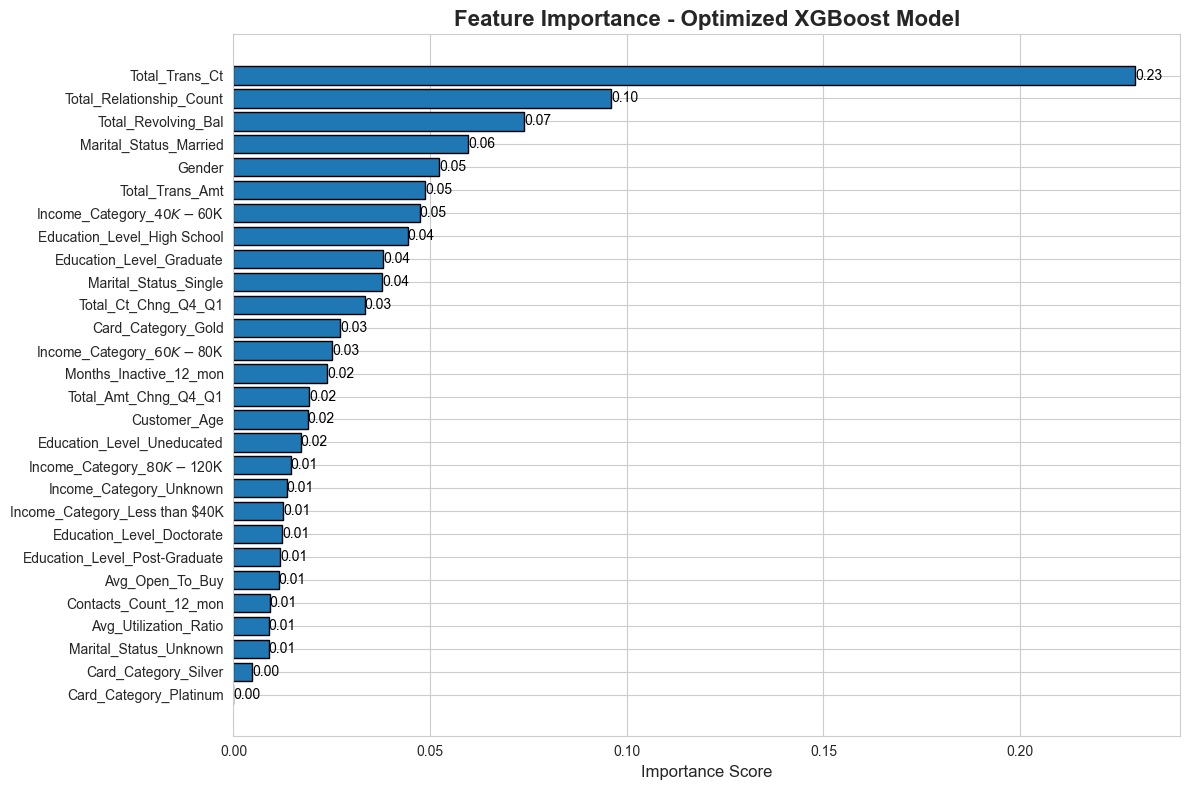

In [64]:
selected_feature_names = X_train_res.columns[rfe_selector.get_support()]

# Feature importance of final XGBoost model
importances = best_xgb.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# plot

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

#layout
sns.set_style("whitegrid") 
plt.figure(figsize=(12, 8)) 

# horizontal bar plot
bars = plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='#1f77b4', edgecolor='black')

plt.title('Feature Importance - Optimized XGBoost Model', fontsize=16, fontweight='bold') 
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('')

for bar in bars:
    width = bar.get_width()
    # score on each bar
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout() 
plt.show()

The top two predictors, Total_Trans_Ct and Total_Relationship_Count, show that low customer activity and low product holding are the primary drivers of attrition, which directly aligns with the significant differences observed in the box plots. Metrics related to transaction changes (Total_Revolving_Bal, Total_Trans_Amt) also rank highly, while demographic features like Gender and Marital_Status hold less predictive power but still offer minor contributions.

##### ROC Curve

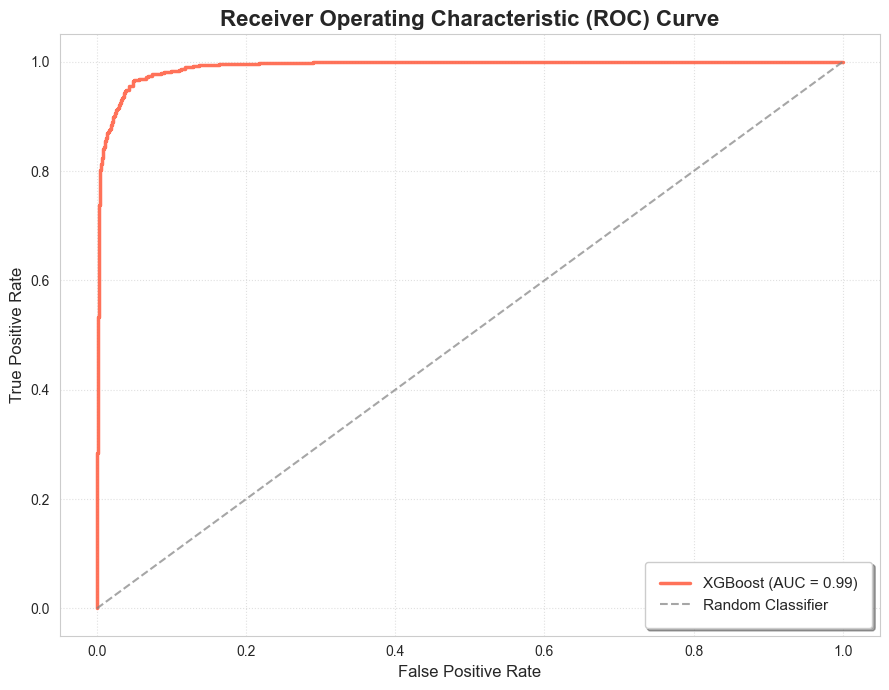

In [65]:
y_probs = best_xgb.predict_proba(X_test_sel)[:,1]
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

sns.set_style("whitegrid") 
plt.figure(figsize=(9, 7)) 

# Roc Curve
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})', 
         color='#FF6347', linewidth=2.5, alpha=0.9) 

# Plot the line of random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1.5, alpha=0.7, label='Random Classifier')

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold') 
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)

# Legend
plt.legend(loc='lower right', fontsize=11, frameon=True, shadow=True, borderpad=1)

# Add a grid
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout() 
plt.show()

The Area Under the Curve (AUC) score of 0.99 indicates that the optimized XGBoost model has exceptional discriminatory power between the two classes (Churners and Existing Customers). This result means that the model can correctly distinguish between the positive and negative classes 99% of the time. This high AUC score demonstrates that the final modeling strategy is highly successful, yielding a robust and reliable predictor for customer churn.